In [89]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

#import the data file to the DataFrame 
data_us = pd.read_csv('werey/US Immigration Statistics (Ver 1.7.23).csv',index_col='Year')

#show content of the data 
data_us.head() 


,Immigrants Obtaining Lawful Permanent Resident Status,Refugee Arrivals,Noncitizen Apprehensions,Noncitizen Removals,Noncitizen Returns
Year,,,,,
1980,"524,295","207,116","910,361","18,013","719,211"
1981,"595,014","159,252","975,780","17,379","823,875"
1982,"533,624","98,096","970,246","15,216","812,572"
1983,"550,052","61,218","1,251,357","19,211","931,600"
1984,"541,811","70,393","1,246,981","18,696","909,833"


In [90]:
#overview of the data structures 
data_us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 1980 to 2021
Data columns (total 5 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Immigrants Obtaining Lawful Permanent Resident Status  42 non-null     object
 1   Refugee Arrivals                                       42 non-null     object
 2   Noncitizen Apprehensions                               42 non-null     object
 3   Noncitizen Removals                                    42 non-null     object
 4   Noncitizen Returns                                     42 non-null     object
dtypes: object(5)
memory usage: 2.0+ KB


In [91]:
#show the statistics summary
data_us.describe()

,Immigrants Obtaining Lawful Permanent Resident Status,Refugee Arrivals,Noncitizen Apprehensions,Noncitizen Removals,Noncitizen Returns
count,42,42,42,42,42
unique,42,42,42,42,42
top,"524,295","207,116","910,361","18,013","719,211"
freq,1,1,1,1,1


In [92]:
#for calculation,convert the colunm data into a float 
def convert_str_to_float(columns):
    for column in columns:
        data_us[column]= data_us[column].astype(str).str.replace(',','')
        data_us[column] = data_us[column].astype(float)
    return

#Call the function with columns to change the columnsitems to a float
convert_str_to_float(['Immigrants Obtaining Lawful Permanent Resident Status']) 
convert_str_to_float(['Refugee Arrivals'])
convert_str_to_float(['Noncitizen Apprehensions'])	
convert_str_to_float(['Noncitizen Removals'])
convert_str_to_float(['Noncitizen Returns'])

data_us.head() 

,Immigrants Obtaining Lawful Permanent Resident Status,Refugee Arrivals,Noncitizen Apprehensions,Noncitizen Removals,Noncitizen Returns
Year,,,,,
1980,524295.0,207116.0,910361.0,18013.0,719211.0
1981,595014.0,159252.0,975780.0,17379.0,823875.0
1982,533624.0,98096.0,970246.0,15216.0,812572.0
1983,550052.0,61218.0,1251357.0,19211.0,931600.0
1984,541811.0,70393.0,1246981.0,18696.0,909833.0


In [93]:
#display the correlation of the data 
data_us.corr(method='kendall') 

,Immigrants Obtaining Lawful Permanent Resident Status,Refugee Arrivals,Noncitizen Apprehensions,Noncitizen Removals,Noncitizen Returns
Immigrants Obtaining Lawful Permanent Resident Status,1.000000,-0.119628,-0.217189,0.437863,-0.161440
Refugee Arrivals,-0.119628,1.000000,0.089431,-0.305459,0.177700
Noncitizen Apprehensions,-0.217189,0.089431,1.000000,-0.263647,0.763066
Noncitizen Removals,0.437863,-0.305459,-0.263647,1.000000,-0.240418
Noncitizen Returns,-0.161440,0.177700,0.763066,-0.240418,1.000000


In [94]:
#for a better correlation values,
#pick two columns Immigrants Obtaining Lawful Permanent Resident Status and noncitzen revomal for correlation
#calculate the total population of the two separate column and obtain the population percentage of each year 
#create new two columns to the DataFrame to add the result 

def create_new_column(columns):
    for column in columns:
        total = data_us[column].sum()
        data_us[f'{column} (%)']=data_us[column]*100/total
    return
    
#Call the function with new columns for Immigration Status and Removals
create_new_column(['Immigrants Obtaining Lawful Permanent Resident Status'])
create_new_column(['Noncitizen Removals'])

#show the new added columns
data_us.head()

,Immigrants Obtaining Lawful Permanent Resident Status,Refugee Arrivals,Noncitizen Apprehensions,Noncitizen Removals,Noncitizen Returns,Immigrants Obtaining Lawful Permanent Resident Status (%),Noncitizen Removals (%)
Year,,,,,,,
1980,524295.0,207116.0,910361.0,18013.0,719211.0,1.365351,0.238332
1981,595014.0,159252.0,975780.0,17379.0,823875.0,1.549515,0.229943
1982,533624.0,98096.0,970246.0,15216.0,812572.0,1.389645,0.201324
1983,550052.0,61218.0,1251357.0,19211.0,931600.0,1.432426,0.254183
1984,541811.0,70393.0,1246981.0,18696.0,909833.0,1.410966,0.247369


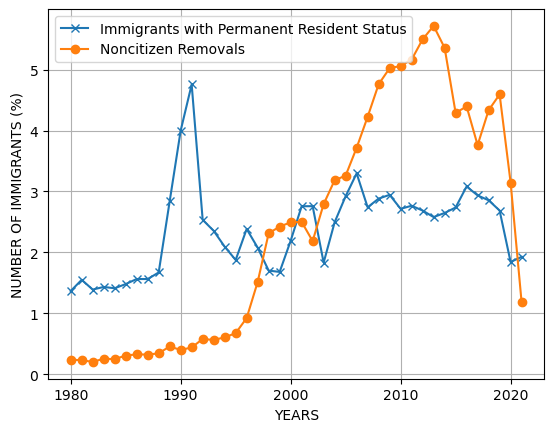

In [95]:
#plot of chart Immigrants Obtaining Lawful Permanent Resident Status (%) against the years 

figure,ax = plt.subplots(dpi=100)
ax.plot(data_us.index,data_us['Immigrants Obtaining Lawful Permanent Resident Status (%)'],
        label='Immigrants with Permanent Resident Status',marker='x')

#plot of chart Noncitizen Removals	Noncitizen (%) against againt the years
ax.plot(data_us.index,data_us['Noncitizen Removals (%)'],label='Noncitizen Removals',marker='o')

#customize both plots
ax.set_xlabel('YEARS')
ax.set_ylabel('NUMBER OF IMMIGRANTS (%)')
ax.grid(True)
ax.legend()
plt.show()



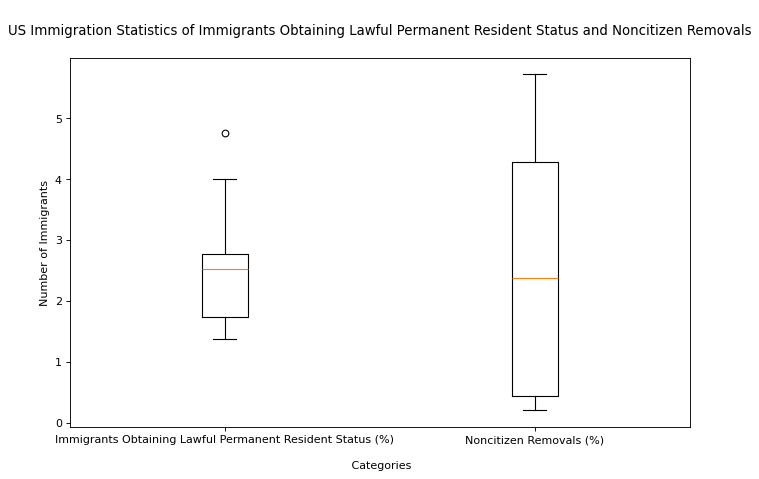

In [96]:
# create boxplot graph showing the correlation,distribution 
#between immigrant obataining permanent resident(%) and non citizen removal(%) colunmn

def create_boxplot(data, *columns):
    plt.figure(dpi=80, figsize=(10, 6))
    
    # create a variabe to store the data column for looping
    boxplot_data = [data[column] for column in columns]
    
    # Plot box plots for required columns
    plt.boxplot(boxplot_data, labels=columns)
    
    plt.xlabel('\n Categories')
    plt.ylabel('Number of Immigrants')
    plt.title(
        '\nUS Immigration Statistics of Immigrants Obtaining Lawful Permanent Resident Status and Noncitizen Removals\n ')
    plt.show()

# Call the function with columns for Immigration Status and Removals
create_boxplot(data_us, 'Immigrants Obtaining Lawful Permanent Resident Status (%)', 'Noncitizen Removals (%)')


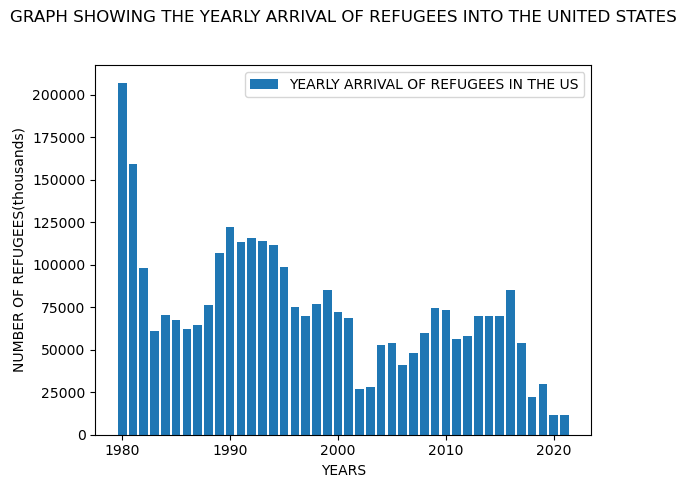

In [97]:
#plot a barchart graph depiciting the yearly arrival of the refugees
plt.figure(dpi=100)
plt.bar(data_us.index,data_us['Refugee Arrivals'],label='YEARLY ARRIVAL OF REFUGEES IN THE US')

#cutomize the graph by adding title,labels 
plt.title('GRAPH SHOWING THE YEARLY ARRIVAL OF REFUGEES INTO THE UNITED STATES\n\n')
plt.xlabel('YEARS')
plt.ylabel('NUMBER OF REFUGEES(thousands)')
plt.legend()
plt.show()

In [98]:
#the statistics summary of the refugee catergory
data_us['Refugee Arrivals'].describe()


count        42.000000
mean      73705.333333
std       37346.453158
min       11454.000000
25%       54399.500000
50%       69914.500000
75%       85211.000000
max      207116.000000
Name: Refugee Arrivals, dtype: float64

In [99]:
#total number of refugees from 1980-2021
data_us['Refugee Arrivals'].sum()

3095624.0